# Importing Libraries and Datasets

In [2]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 300.2/300.2 kB 9.1 MB/s eta 0:00:00


In [4]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

# Import libraries for NLP
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from sklearn.feature_extraction import text 

# Solve warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Importing Dataset

In [5]:
df = pd.read_csv('C:/Users/Utkarsh Srivastava/Downloads/BIG DATA/Hotel_Reviews.csv')

In [6]:
# Checking the hotel with the highest number of reviews
df.pivot_table(index=['Hotel_Name'], aggfunc='size').nlargest()

Hotel_Name
Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
dtype: int64

In [7]:
print(df['Reviewer_Score'].nlargest(1))
print(df['Reviewer_Score'].nsmallest(1))

7    10.0
Name: Reviewer_Score, dtype: float64
146    2.5
Name: Reviewer_Score, dtype: float64


### Takeaways:
- The dataset has columns with objects and numbers
- The dataset has over 515K observations and 17 features
- The hotel with mode reviews is the Britannia International Hotel Canary Wharf in London

# Create Binary Class

In [8]:
# Turning the score into a binary classification
df['Score'] = df['Reviewer_Score'].apply(lambda x: 0 if x < 6 else 1)

In [9]:
df.shape

(515738, 18)

In [10]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Score'],
      dtype='object')

# Word Cloud

We will create some word clouds to see if our data set makes sense and if our data cleaning words.

## Data Preparation

Let's first prepare the data for the word cloud

In [11]:
# Dropping all columns I will not need
df.drop(columns=['Hotel_Address', 'Additional_Number_of_Scoring',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given',  
       'Tags', 'days_since_review', 'lat', 'lng'], inplace=True)

In [12]:
# Checking DataFrame
df.head(2)

,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,Score
0,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,0
1,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,7.5,1


## Top Words

In [13]:
# Creating new dfs for each classification
df_positive = df[df['Score']==1]
df_negative = df[df['Score']==0]

In [14]:
# Pulling out the text data for cleaned tweets
data_positive = df_positive['Positive_Review']
data_negative = df_negative['Negative_Review']

In [15]:
# Stop words
stop_words = set(stopwords.words('english'))

# Words that don't bring much sense to a word cloud
add_stop_words = ['t','great','good','nice','lovely','canary','hotel','wharf','rooms','really','stay',
                  'positive','money','like','would','one','did','beds','s','didn','free','windows',
                  'tired','check','excellent','value','air','need','just','sleep','work','close','time','pay',
                   'needs','night','told','2','day','double','4', 'london','asked','amazing','3','bad']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Function to tokenize tweets and remove stop words with NLTK built-in library
def process_text(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

In [16]:
# Creating lists for processed positive and negative reviews
process_positive = list(map(process_text, data_positive))
process_negative = list(map(process_text, data_negative))

In [17]:
# Exact amount of positive review
total_positive_review = set()
for comment in process_positive:
    total_positive_review.update(comment)
len(total_positive_review)

48865

In [18]:
# exact amount of negative review
total_negative_review = set()
for comment in process_negative:
    total_negative_review.update(comment)
len(total_negative_review)

28407

### Takeaways

- There 2,147 positive reviews and 5,083 negative reviews

## Most Common Words in Each Category

Let's see which are the most common words of each category

In [19]:
# Create list with all the words
flat_positive = [item for sublist in process_positive for item in sublist]
flat_negative = [item for sublist in process_negative for item in sublist]

In [20]:
# Use FreqDist to see the most common words
positive_freq = FreqDist(flat_positive)
negative_freq = FreqDist(flat_negative)

In [21]:
# Top 20 Words in the positive reviews
positive_freq.most_common(20)

[('staff', 187940),
 ('location', 176079),
 ('room', 134595),
 ('friendly', 82702),
 ('breakfast', 80331),
 ('helpful', 74243),
 ('clean', 64401),
 ('comfortable', 58308),
 ('bed', 47347),
 ('station', 27614),
 ('perfect', 25489),
 ('service', 24941),
 ('quiet', 21402),
 ('comfy', 20607),
 ('walk', 19833),
 ('bar', 18755),
 ('bathroom', 16570),
 ('modern', 16441),
 ('view', 16408),
 ('fantastic', 15792)]

In [22]:
# Top 20 Words in the negative review
negative_freq.most_common(20)

[('room', 46472),
 ('staff', 13619),
 ('small', 10326),
 ('breakfast', 9078),
 ('bed', 8246),
 ('bathroom', 6290),
 ('poor', 5717),
 ('service', 5580),
 ('reception', 5308),
 ('shower', 4867),
 ('old', 4245),
 ('booking', 3747),
 ('dirty', 3735),
 ('floor', 3619),
 ('water', 3567),
 ('star', 3391),
 ('booked', 3325),
 ('noisy', 3191),
 ('price', 3122),
 ('got', 3110)]

## Visualizing these words

In [23]:
# Choosing the top 20 most common words
positive_bar_counts = [x[1] for x in positive_freq.most_common(30)]
positive_bar_words = [x[0] for x in positive_freq.most_common(30)]

# create counts of hate and not hate with values and words
negative_bar_counts = [x[1] for x in negative_freq.most_common(30)]
negative_bar_words = [x[0] for x in negative_freq.most_common(30)]

In [24]:
# set the color of the bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))
color2 = cm.magma(np.linspace(.4,.8, 30))

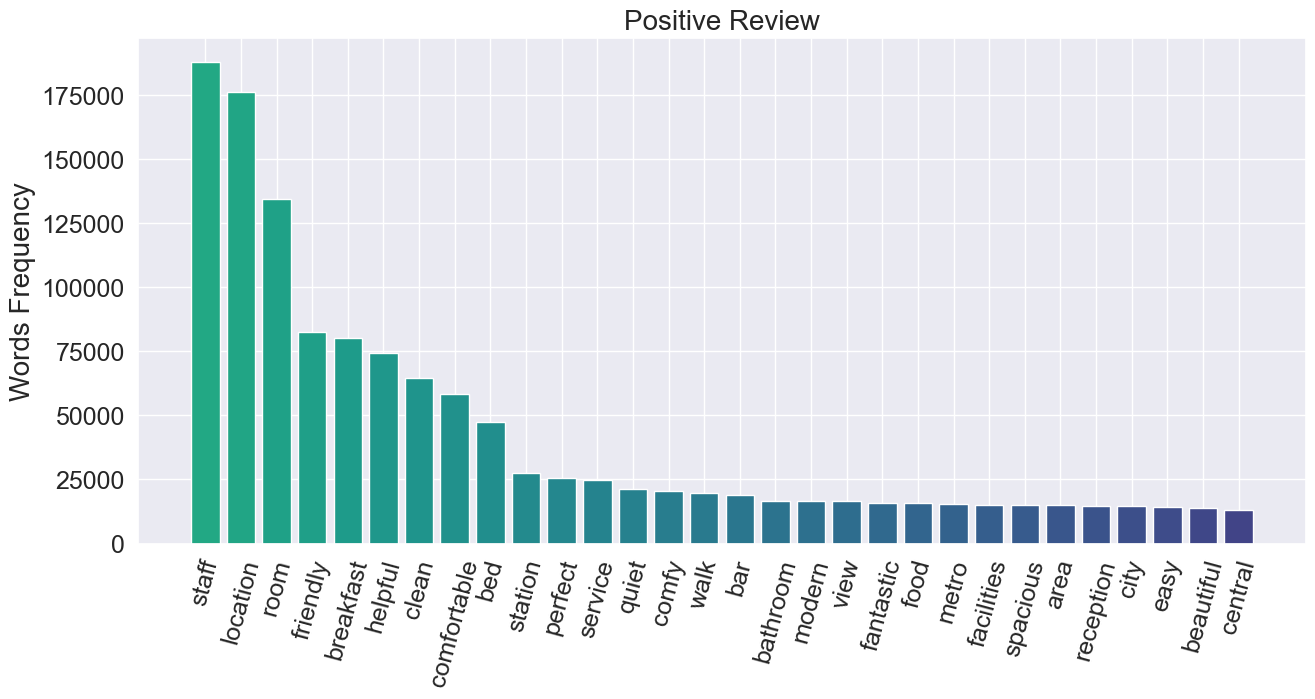

In [25]:
# Plotting the top 20 words in the positive reviews
new_figure = plt.figure(figsize=(24,6))
ax2 = new_figure.add_subplot(122)
ax2.bar(positive_bar_words, positive_bar_counts, color=color )

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=75)
plt.tight_layout(pad=0)
plt.title('Positive Review',fontsize=20)
plt.ylabel('Words Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('C:/Users/Utkarsh Srivastava/Downloads/BIG DATA/images/positive_freq.png', bbox_inches = "tight", pad_inches=.5, dpi=300)
plt.show()

Seems like room, location, staff, clean, and friendly are the most popular words. The managemente can use these words and investigate where the hotel is doing a good job.

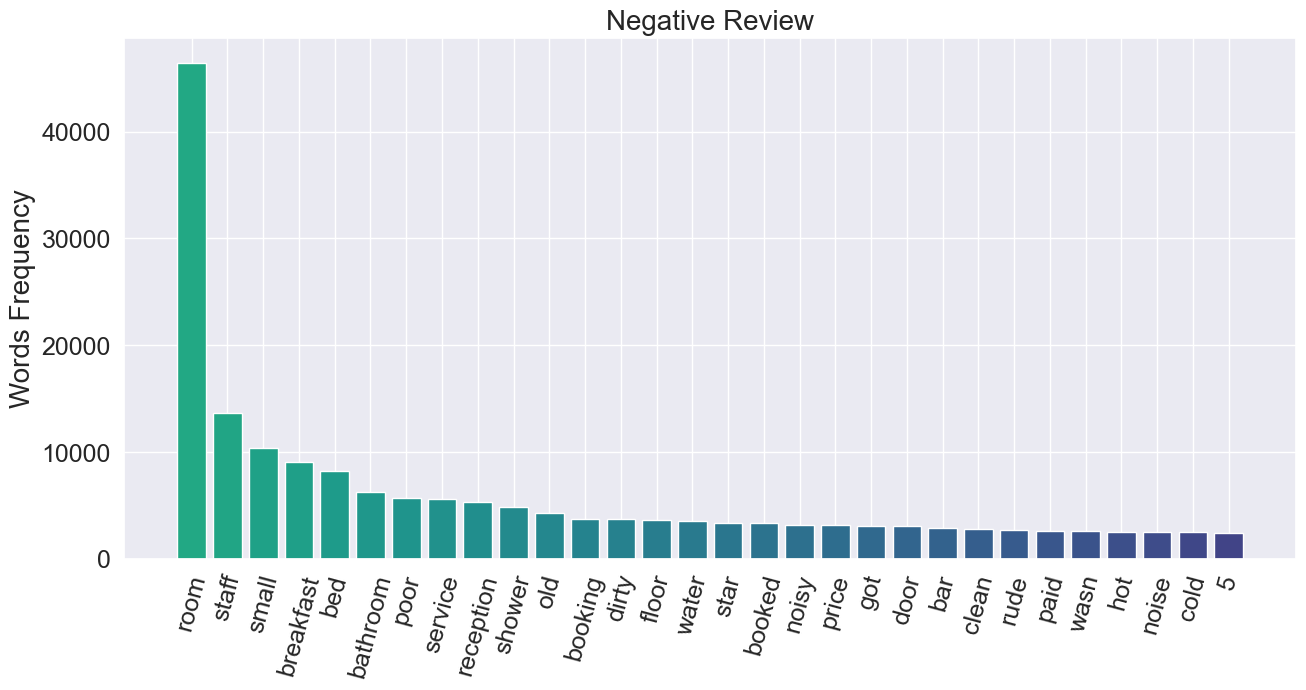

In [26]:
# Plotting the top 20 words in the negative reviews
new_figure = plt.figure(figsize=(24,6))
ax2 = new_figure.add_subplot(122)
ax2.bar(negative_bar_words, negative_bar_counts, color=color)

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=75)
plt.tight_layout(pad=0)
plt.title('Negative Review',fontsize=20)
plt.ylabel('Words Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('C:/Users/Utkarsh Srivastava/Downloads/BIG DATA/images/negative_freq.png', bbox_inches = "tight", pad_inches=.5, dpi=300)
plt.show()

### Takeaways:

- We can see that all the words make sense and are related to hotels. This tells us that the stop words really worked
- From this lists, the hotel management can use to understand what guests who leave negative or positive reviews are talking about
- Seems like room, staff, breakfast, and the fact that the hotel might be old are the main reasons why users complain about a hotel. The management should investigate these points.
- We can see that the word 'room' appears more frequently in the Negative Reviews than in the Positive Reviews

## Word Cloud

In [27]:
# Create dictionaries
negative_dict = dict(zip(negative_bar_words, negative_bar_counts))
positive_dict = dict(zip(positive_bar_words, positive_bar_counts))

### Plotting Positive Reviews Word Cloud

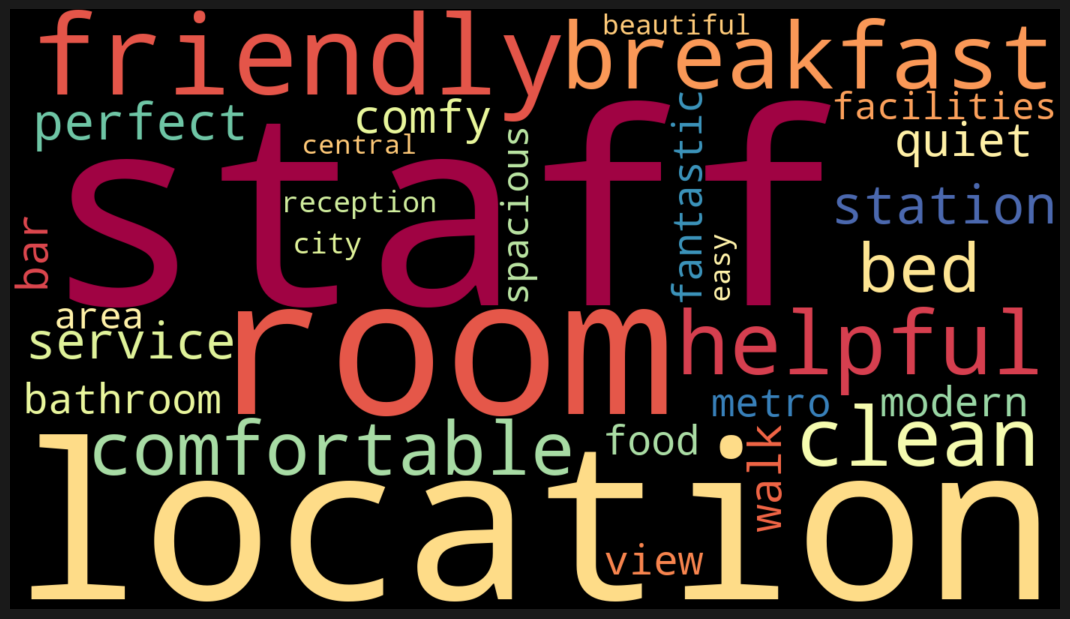

In [28]:
# create the word cloud:
wordcloud = WordCloud(background_color='black', width=1400, height=800, colormap='Spectral').generate_from_frequencies(positive_dict)

# Display the generated image w/ matplotlib:
plt.figure(figsize=(12,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('../images/positive_wordcloud.png', dpi=300)

plt.show()

In this image we can see the words that appear more often in the positive reviews. We can see that all the words make sense and are related to hotels. This tells us that the stop words really worked. From this lists, the hotel management can use to understand what guests who leave negative or positive reviews are talking about

### Plotting Negative Reviews Word Cloud

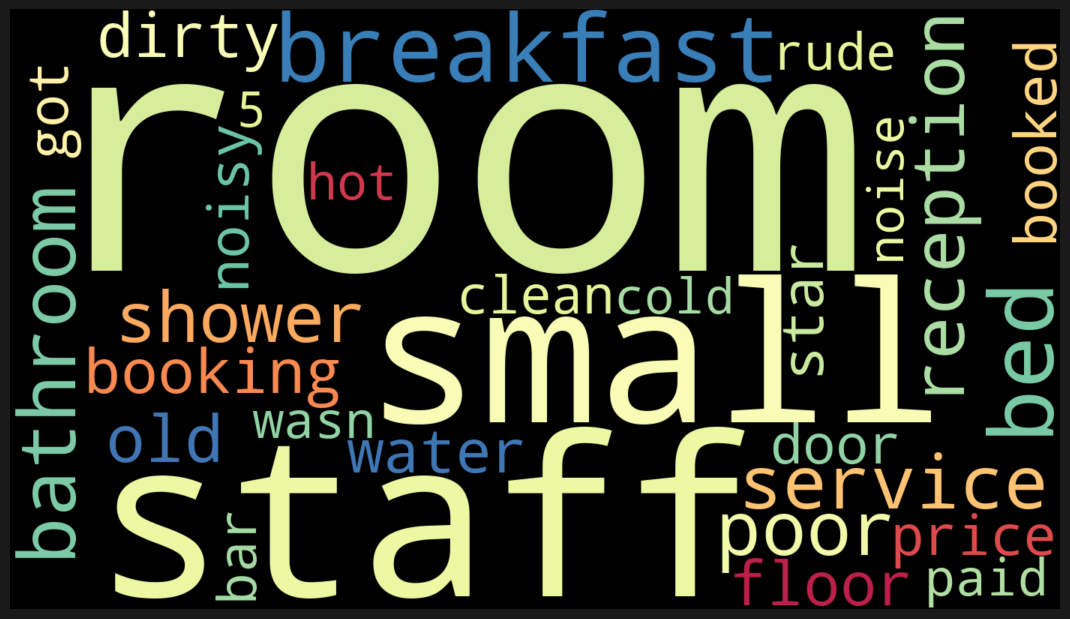

In [29]:
# create the word cloud:
wordcloud = WordCloud(background_color='black', width=1400, height=800, colormap='Spectral').generate_from_frequencies(negative_dict)

# Display the generated image w/ matplotlib:
plt.figure(figsize=(12,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('../images/negative_wordcloud.png', dpi=300)

plt.show()

In this image we can see the words that appear more often in the negative reviews. We can see that all the words make sense and are related to hotels. This tells us that the stop words really worked. From this lists, the hotel management can use to understand what guests who leave negative or positive reviews are talking about